In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [197]:
df_trans = pd.read_csv('twm_transactions.csv', sep = ';')
df_trans.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [198]:
# get a nice table for the data we want
# tran_amt

In [222]:
df_acc = pd.read_csv('twm_accounts.csv', sep = ';')
df_acc.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [199]:
df_merged = pd.merge(df_acc, df_cust, how='left', on = 'cust_id')
df_merged
# df_merged.shape

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,income,age,years_with_bank,nbr_children
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,39382,24,3,1
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,5981,74,4,0
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,5920,66,6,0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,54734,50,0,0
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,26008,34,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00,56088,46,6,0
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00,28867,77,7,0
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00,8681,68,8,0
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46,0,13,5,0


In [200]:
df_merged.sort_values(by='starting_balance')

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,income,age,years_with_bank,nbr_children
214,4561143213629640,1362964,CC,Y,19.3.1995,NaN,0.00,1000.00,5779,79,9,0
104,4561143213631850,1363185,CC,Y,18.9.1995,NaN,0.00,1000.00,7353,19,4,0
105,4561143213634470,1363447,CC,Y,6.10.1995,NaN,0.00,1000.00,17052,41,1,0
562,4561143213631280,1363128,CC,Y,1.3.1995,NaN,0.00,140.00,4187,19,4,0
1310,4561143213632720,1363272,CC,Y,11.8.1995,NaN,0.00,1016.12,22758,30,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
302,13630112,1363011,CK,Y,4.2.1990,NaN,12730.29,1615.18,90248,55,5,0
828,13625942,1362594,CK,Y,29.4.1995,NaN,14213.05,4418.79,69205,53,3,2
646,13627253,1362725,SV,Y,30.1.1995,NaN,17303.42,16095.50,68933,52,2,1
567,13625662,1362566,CK,N,5.6.1992,18.3.1995,17315.16,38.10,127848,54,4,1


In [201]:
# check for any null values
df_merged.isna().sum()

acct_nbr               0
cust_id                0
acct_type              0
account_active         0
acct_start_date        0
acct_end_date       1266
starting_balance       0
ending_balance         0
income                 0
age                    0
years_with_bank        0
nbr_children           0
dtype: int64

In [202]:
df_merged.sort_values(by='acct_type', ascending= False)

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,income,age,years_with_bank,nbr_children
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,39382,24,3,1
393,13628953,1362895,SV,Y,27.6.1995,NaN,169.96,96.25,26387,56,6,1
415,13632673,1363267,SV,Y,22.12.1995,NaN,840.79,1699.39,84184,37,7,0
962,13629333,1362933,SV,Y,3.6.1995,NaN,268.67,17.18,19823,55,5,1
963,13632093,1363209,SV,N,3.2.1986,29.8.1995,264.69,1813.90,32739,59,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
966,4561143213634860,1363486,CC,Y,8.12.1995,NaN,0.00,0.00,39942,41,1,5
965,4561143213625480,1362548,CC,Y,11.11.1986,NaN,6965.25,68.68,44554,59,9,2
413,4561143213627300,1362730,CC,Y,1.9.1995,NaN,0.00,3000.00,12988,37,7,3
961,4561143213626330,1362633,CC,Y,23.1.1994,NaN,249.18,1000.00,10818,28,4,2


In [203]:
# get the savings account information and plot it against the ending balance

accounts = df_merged[(df_merged['acct_type'] == "SV  ")]

In [204]:
# not only SV but 'SV  '
df_merged['acct_type'][0]

'SV  '

In [205]:
ending_b = accounts['ending_balance']
age_data = accounts['age']

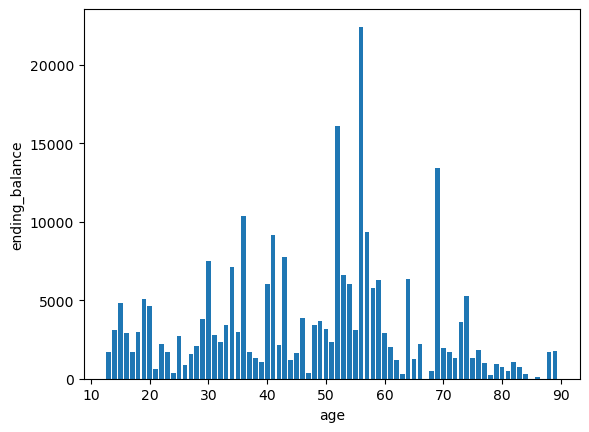

In [206]:
# visualize the age against balance
plt.bar(age_data, ending_b)
plt.xlabel('age')
plt.ylabel('ending_balance')
plt.show()

In [207]:
# try scaling the data
scaler = MinMaxScaler()
# scaled_ending = scaler.fit_transform(ending_b)


In [208]:
df_savings = pd.read_csv("twm_savings_acct.csv", sep=';')
df_savings
# df_savings.isna().sum()
# basically some people still have an open account

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [209]:
# drop the categorical data
# save the customer id and account number in case we need later
savings_id = df_savings['cust_id']
savings_accounts = df_savings['acct_nbr']

df_savings = df_savings.drop(labels =['starting_balance', 'acct_start_date', 'acct_end_date', 'cust_id', 'acct_nbr'], axis=1)

In [210]:
# map the different types of savings accounts to binary
acc_type = {'BS  ':0, 'MM  ':1}
acc_active = {'N ': 0, 'Y ': 1}

In [211]:
df_savings.account_active = [acc_active[item] for item in df_savings.account_active]

In [212]:
# run cell once only
df_savings.acct_type = [acc_type[item] for item in df_savings.acct_type]

In [213]:
df_savings.head()

,minimum_balance,acct_type,account_active,ending_balance
0,100,0,1,122.54
1,500,1,0,12.89
2,100,0,1,254.02
3,100,0,1,609.33
4,100,0,0,2901.35


In [214]:
# scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()

# scale the data
scaled_savings = pd.DataFrame(scaler.fit_transform(df_savings), columns=df_savings.columns)
scaled_savings.head()

,minimum_balance,acct_type,account_active,ending_balance
0,0.0,0.0,1.0,0.005341
1,1.0,1.0,0.0,0.000453
2,0.0,0.0,1.0,0.011203
3,0.0,0.0,1.0,0.027044
4,0.0,0.0,0.0,0.129229


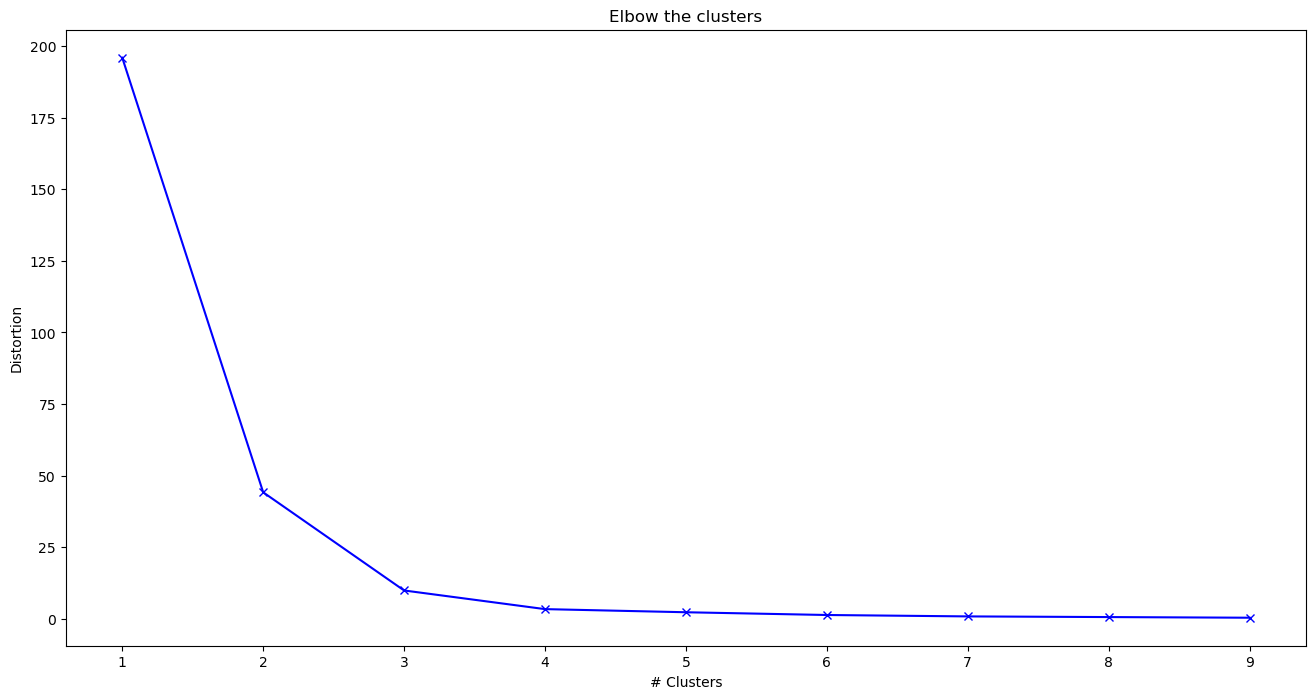

In [215]:
# try to make an elbow chart and use Kmeans
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(scaled_savings)
    distortions.append(kmean.inertia_)
    
plt.figure(figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('# Clusters')
plt.ylabel('Distortion')
plt.title('Elbow the clusters')
plt.show()

# 3 clusters?

In [216]:
km = KMeans(n_clusters = 3, # based on elbow plot
            n_init = 10,
            random_state = 0)

y_km = km.fit_predict(scaled_savings)

In [217]:
# Define a function that will show how the k-means algorithm assigned the 
# clusters to our data
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

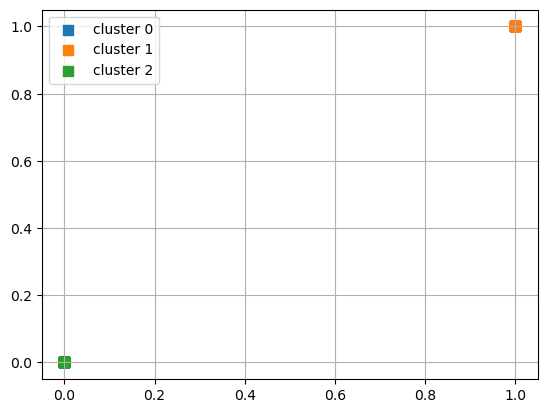

In [218]:
plot_clusters(scaled_savings.to_numpy(), y_km)

In [219]:
# df_savings_added = data.merge(df_savings[['minimum_balance', 'acct_type',
#                                   'account_active', 'ending_balance']],
#                       left_on = 'cust_id',
#                       right_on = 'cust_id',
#                       how = 'left')

In [220]:
df_trans = pd.read_csv("twm_transactions.csv", sep= ';')
df_trans.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [221]:
df_trans_grouped = df_trans()

TypeError: 'DataFrame' object is not callable